# Exercise 1: **Statistical study of smokers**


### NBE-4070: Basics of Biomedical Data Analysis

**Stephane Deny**: stephane.deny@aalto.fi

**Carlos Sevilla Salcedo**: carlos.sevillasalcedo@aalto.fi

**Hyunkyung Choo**: hyunkyung.choo@aalto.fi

<br></br>
<center><img src="https://drive.google.com/uc?export=view&id=1pKi7IMOOe_huyEyBTj4mfAEF6EJ_kdp2" width="40%">
</center>

# Problem description

You are a medical researcher studying the effects of smoking on heart health. Over the years, previous research has found that blood pressure is an important indicator of heart health. Your objective here is to assess the effect of smoking on two types of blood pressure which are equally important in monitoring heart health: systolic (pressure in the arteries when the heart beats) and diastolic (pressure in the arteries when the heart rests between beats).

You have access to a dataset of 100 subjects: 34 smokers and 66 non-smokers. For each subject, the 4 following features have been measured:
- age,
- weight,
- systolic blood pressure,
- diastolic blood pressure.

NOTE: This dataset has been artificially generated for the purpose of the exercise. It has not been collected from real subjects.

## Data loading

The dataset is stored in the file `HospitalData.pickle`. The code below loads this file and stores the feature values for each subject in variable `X`, the identifier of whether a subjects is or not a smoker in variable `y` (0: non-smoker, 1: smoker), and the name of each feature in variable `feats`.

In [1]:
!gdown 1EASsn6XQN9Uqnr5GEFeDbuSZ2tMJL6Ab # download the dataset

Downloading...
From: https://drive.google.com/uc?id=1EASsn6XQN9Uqnr5GEFeDbuSZ2tMJL6Ab
To: /content/HospitalData.pickle
100% 4.29k/4.29k [00:00<00:00, 10.9MB/s]


In [2]:
# loading all the relevant packages for the exercise
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import stats
import pickle
%matplotlib inline

# a function that loads file encoded in the "pickle" format
def load_pickle_file(name):
    with open(name + '.pickle','rb') as f:  # Python 3: open(..., 'wb')
        obj = pickle.load(f)
    return obj

# loading the data file
(X, y, feats) = load_pickle_file('HospitalData')

# printing the shapes of the different data fields
print(X.shape, y.shape, feats)

(100, 4) (100,) ['Age', 'Weight', 'BloodPressure_Systolic', 'BloodPressure_Diastolic']


## 1. Vizualizing the data (1 point)

First, vizualise the dataset with the help of bar plots. For this, follow these steps:
- Compute the mean systolic and diastolic blood pressure for smokers and non-smokers. Print these values.
- Compute the standard deviations around each of those means. Print these values.
- In a bar plot, show the mean systolic blood pressure of smokers vs. non-smokers. Indicate the standard deviations around those means with an error bar.
- Generate a similar bar plot for diastolic blood pressure.

NOTE 1: As a first step, you can store the data corresponding to subjects that don't smoke in a variable `X0`, and the data from subjects that smoke in a variable `X1`.

NOTE 2: Plots should always have a title. X and Y axes should always be labelled.

In [3]:
#CODE YOUR SOLUTION HERE


The blood pressure of the non-smoking cohort has 10.00 mean, 15.00 standard deviation


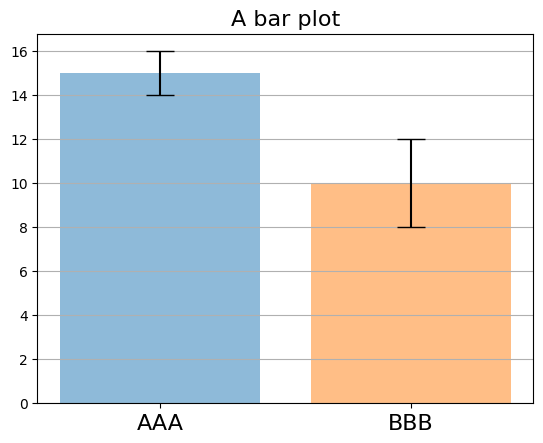

In [4]:
#FIND SOME HELP HERE

# This instruction selects only the lines of the matrix X corresponding to non-smokers (boolean condition y == 0)
X0 = X[y==0]

# This instruction computes the mean of a list or array
m = np.mean([1,2,3])

# This instruction computes the standard deviation of a list or array
sd = np.std([1,2,3])

#Printing values in a nice format
print('The blood pressure of the non-smoking cohort has %.2f mean, %.2f standard deviation' %(10.0, 15.0))

# This set of instructions draws a simple bar plot with random values
fig, ax = plt.subplots()
ax.bar(0, 15, yerr=1, align='center', alpha=0.5, ecolor='black', capsize=10, label='Smokers')
ax.bar(1, 10, yerr=2, align='center', alpha=0.5, ecolor='black', capsize=10, label='Non-smokers')
ax.set_xticks(range(2))
ax.set_xticklabels(['AAA', 'BBB'], fontsize = 16)
ax.set_title('A bar plot', fontsize = 16)
ax.yaxis.grid(True)


### Questions (1 point):
- In general, what does the standard deviation represent?
- Do you notice a difference in the range of blood pressure between smokers and non-smokers for each type of blood pressure (systolic and diastolic)?
- Using the chart below, do you think that the smokers in this study are healthy?

<br></br>
<center><img src="https://drive.google.com/uc?export=view&id=17zAhFng6bjboFdi3gs2rFZm4LsPc2THE" width="40%">
</center>
source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

#YOUR ANSWER HERE

## 2. Assessing statistical significance by vizualizing confidence intervals (1 point)

You would now like to know if the differences in blood pressure observed between smokers and non-smokers are statistically significant.

First, vizualise the 95% confidence intervals around the means:
- Compute the 95% confidence interval around the mean for all conditions (smokers, non-smokers, systolic, diastolic).
- Generate the same bar plots as previously, but where the error bars indicate 95% confidence intervals instead of standard deviations.

In [5]:
#CODE YOUR SOLUTION HERE

### Questions (1 point):
- What does the 95% confidence interval represent?
- From these vizualisations, would you guess that there is a statistically significant difference in average blood pressure between smokers and non-smokers, for the different types of blood pressure?

#YOUR ANSWER HERE

## 3. Assessing statistical significance using t-tests (1 point)


You will now perform t-tests to verify that the average blood pressure observed in smokers and non-smokers are statistically different:
- Decide which type of t-test is appropriate for this test: paired, unpaired, one-tailed, two-tailed?
- Apply the selected t-test for the different blood pressure types (systolic, diastolic).
- Print the p-values resulting from these tests.

In [6]:
#CODE YOUR SOLUTION HERE

In [7]:
#FIND SOME HELP HERE

# t-test documentation:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

### Questions (1 point):
- What is a t-test?
- Which type of t-test did you apply and why?
- Do you find statistically significant differences in average blood pressure between smokers and non-smokers, for the different types of blood pressure?

#YOUR ANSWER HERE

## 4. Testing for possible confounding factors (1 point)

In this dataset, we have found differences in blood pressure between smokers and non-smokers. However, other existing differences between the smokers and non-smokers selected for this study may explain the differences in blood pressure. Such other possibles causes for the effect observed are called confounding factors. For example, the smokers in this study could be older than the non-smokers: age could be a confouding factor.

In order to test for potential confounding factors:
- Run a t-test on the age and weight of the two cohorts (smokers vs. non-smokers).
- Print the p-values for these tests.



In [8]:
# CODE YOUR SOLUTION HERE

### Questions (1 point):
- Do you find statistically significant differences in age or weight between the two cohorts (smokers vs. non-smokers)?
- How do you interpret these results? Comment on the possible causality relations between weight, smoking status and blood pressure in this study.

#YOUR ANSWER HERE